<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Ridge Regression

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Machine Learning in Python: a Hands-on Guide with Code". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, Applied Machine Learning in Python: a Hands-on Guide with Code, https://geostatsguy.github.io/MachineLearningDemos_Book. 
```

The workflows in this book and more are available here:

```{admonition} Cite the MachineLearningDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, MachineLearningDemos: Python Machine Learning Demonstration Workflows Repository (0.0.1). Zenodo. [![DOI](https://zenodo.org/badge/862519860.svg)](https://zenodo.org/doi/10.5281/zenodo.13835312)
```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **Ridge Regression**. 

**YouTube Lecture**: check out my lectures on:

* [Introduction to Machine Learning](https://youtu.be/zOUM_AnI1DQ?si=wzWdJ35qJ9n8O6Bl)
* [Linear Regression](https://youtu.be/0fzbyhWiP84)
* [Ridge Regression](https://youtu.be/pMGO40yXZ5Y?si=ygJAheyX-v2BmSiR)
* [LASSO Regression](https://youtu.be/cVFYhlCCI_8?si=NbwIDaZj30vxezn2)
* [Norms](https://youtu.be/JmxGlrurQp0?si=vuF1TXDbZkyRC1j-)

These lectures are all part of my [Machine Learning Course](https://youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&si=XonjO2wHdXffMpeI) on YouTube with linked well-documented Python workflows and interactive dashboards. My goal is to share accessible, actionable, and repeatable educational content. If you want to know about my motivation, check out [Michael's Story](https://michaelpyrcz.com/my-story). 

#### Motivations for Ridge Regression

Here's a simple workflow, demonstration of ridge regression and comparison to linear regression for machine learning-based predictions. Why start with linear regression?

* Linear regression is the simplest parametric predictive machine learning model
* We learn about training machine learning models with an analytical solution calculated from the derivative of training MSE
* Get's us started with the concepts of loss functions and norms
* We have access to analytics expressions for confidence intervals for model uncertainty and hypothesis tests for parameter significance

Why cover ridge regression next?

* Some times linear regression is not simple enough and we actually need a simpler model! 
* Introduce the concept of model regularization and hyperparameter tuning
  
Here's some basic details about predictive machine learning ridge regression models, let's start with linear regression first and build to ridge regression: 

#### Linear Regression

Linear regression for prediction.  Here are some key aspects of linear regression:

**Parametric Model**

This is a parametric predictive machine learning model, we accept an a prior assumption of linearity and then gain a very low parametric representation that is easy to train without a onerous amount of data.

* the fit model is a simple weighted linear additive model based on all the available features, $x_1,\ldots,x_m$.
* the parametric model takes the form of: 

$$
y = \sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0
$$

**Least Squares**

The analytical solution for the model parameters, $b_1,\ldots,b_m,b_0$, is available for the L2 norm loss function, the errors are summed and squared known a least squares.
* we minimize the error, residual sum of squares (RSS) over the training data: 

$$
RSS = \sum_{i=1}^n \left(y_i - (\sum_{\alpha = 1}^m b_{\alpha} x_{\alpha,i} + b_0) \right)^2
$$

where $y_i$ is the actual response feature values and $\sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0$ are the model predictions, over the $\alpha = 1,\ldots,n$ training data.

* this may be simplified as the sum of square error over the training data, 

\begin{equation}
\sum_{i=1}^n (\Delta y_i)^2
\end{equation}

where $\Delta y_i$ is actual response feature observation $y_i$ minus the model prediction $\sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0$, over the $i = 1,\ldots,n$ training data.

**Assumptions**

There are important assumption with our linear regression model,
* **Error-free** - predictor variables are error free, not random variables 
* **Linearity** - response is linear combination of feature(s)
* **Constant Variance** - error in response is constant over predictor(s) value
* **Independence of Error** - error in response are uncorrelated with each other
* **No multicollinearity** - none of the features are redundant with other features 

#### Ridge Regression

With ridge regression we add a hyperparameter, $\lambda$, to our minimization, with a shrinkage penalty term, $\sum_{j=1}^m b_{\alpha}^2$.

$$
\sum_{i=1}^n \left(y_i - \left(\sum_{\alpha = 1}^m b_{\alpha} x_{\alpha,i} + b_0 \right) \right)^2 + \lambda \sum_{j=1}^m b_{\alpha}^2
$$

As a result, ridge regression training integrates two and often competing goals to find the model parameters, 

* find the model parameters that minimize the error with training data
* minimize the slope parameters towards zero

Note: lambda does not include the intercept, $b_0$.

The $\lambda$ is a hyperparameter that controls the degree of fit of the model and may be related to the model bias-variance trade-off.

* for $\lambda \rightarrow 0$ the solution approaches linear regression, there is no bias (relative to a linear model fit), but the model variance is likely higher
* as $\lambda$ increases the model variance decreases and the model bias increases, the model becomes simpler
* for $\lambda \rightarrow \infty$ the model parameters $b_1,\ldots,b_m$ shrink to 0.0 and the model predictions approaches the training data response feature mean

#### Train / Test Data Split for Cross Validation-based Hyperparameter Tuning

The available data is split into training and testing subsets.

* in general 15-30% of the data is withheld from training to apply as testing data
* testing data selection should be fair, the same difficulty of predictions (offset/different from the training data) [Fair Train-test Split Paper](https://www.sciencedirect.com/science/article/pii/S0920410521015023) (Salazar et al., 2022).
* there are various other methods including train, validation and testing splits, and k-fold cross validation

Fundamentally, all these methods proceed by training models with training data and testing model accuracy over withheld testing data for a range of hyperparameters. Then the hyperparameters are selected that minimize error with the withheld testing dataset, this is hyperparameter tuning.

* after hyperparameter tuning the model is retrained with all of the data with the selected hyperparameters.
* the train, validation and testing approach then uses a 2nd withheld subset of the dataset to check the tuned model with data not applied for model training nor model tuning.

In the following workflow we will use the train and test approach for hyperparameter tuning. Here's more details and a summary of the related concepts.

#### Machine Learning Model Parameter Training

The training data is applied to train the model parameters such that the model minimizes mismatch with the training data

* it is common to use **mean square error** (known as a **L2 norm**) as a loss function summarizing the model mismatch

* **minimizing the loss function** for simple models an analytical solution may be available, but for most machine this requires an iterative optimization method to find the best model parameters

This process is repeated over a range of model complexities specified by hyperparameters. 

#### Machine Learning Model Hyperparameter Tuning

The withheld testing data is retrieved and loss function (usually the **L2 norm** again) is calculated to summarize the error over the testing data

* this is repeated over the range of specified hyperparameters

* the model complexity / hyperparameters that minimize the loss function / error summary in testing is selected

This is known are model hyperparameter tuning.

#### Machine Learning Model Overfit

More model complexity / flexibility than can be justified with the available data, data accuracy, frequency and coverage

* Model explains “idiosyncrasies” of the data, capturing data noise/error in the model
* High accuracy in training, but low accuracy in testing / real-world use away from training data cases – poor ability of the model to generalize

If the model error in testing is increasing while the model error in training is decreasing, this is an indicator of an overfit model.

#### Load the Required Libraries

We will also need some standard packages. These should have been installed with Anaconda 3.

In [1]:
%matplotlib inline                                         
suppress_warnings = False
import os                                                     # to set current working directory 
import os                                                     # to set current working directory 
import numpy as np                                            # ndarrays and matrix math
import scipy.stats as st                                      # statistical methods
import pandas as pd                                           # DataFrames
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
from sklearn.metrics import mean_squared_error, r2_score      # specific measures to check our models
from sklearn import linear_model                              # linear regression
from sklearn.linear_model import Ridge                        # ridge regression implemented in scikit learn
from sklearn.model_selection import cross_val_score           # multi-processor K-fold crossvalidation
from sklearn.model_selection import train_test_split          # train and test split
from IPython.display import display, HTML                     # custom displays
cmap = plt.cm.inferno                                         # default color bar, no bias and friendly for color vision defeciency
plt.rc('axes', axisbelow=True)                                # grid behind plotting elements
if suppress_warnings == True:  
    import warnings                                           # supress any warnings for this demonstration
    warnings.filterwarnings('ignore')                

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare Functions

Let's define a function to streamline the addition specified percentiles and major and minor gridlines to our plots.

In [2]:
def weighted_percentile(data, weights, perc):                 # calculate weighted percentile 
    ix = np.argsort(data)
    data = data[ix] 
    weights = weights[ix] 
    cdf = (np.cumsum(weights) - 0.5 * weights) / np.sum(weights) 
    return np.interp(perc, cdf, data)
# Function from iambr on StackOverflow @ https://stackoverflow.com/questions/21844024/weighted-percentile-using-numpy/32216049

def histogram_bounds(values,weights,color):                   # add uncertainty bounds to a histogram          
    p10 = weighted_percentile(values,weights,0.1); avg = np.average(values,weights=weights); p90 = weighted_percentile(values,weights,0.9)
    plt.plot([p10,p10],[0.0,45],color = color,linestyle='dashed')
    plt.plot([avg,avg],[0.0,45],color = color)
    plt.plot([p90,p90],[0.0,45],color = color,linestyle='dashed')

def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks 

def display_sidebyside(*args):                                # display DataFrames side-by-side (ChatGPT 4.0 generated Spet, 2024)
    html_str = ''
    for df in args:
        html_str += df.head().to_html()  # Using .head() for the first few rows
    display(HTML(f'<div style="display: flex;">{html_str}</div>'))

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see below) data file in this working directory.  

In [3]:
#os.chdir("C:\PGE337")                                        # set the working directory

You will have to update the part in quotes with your own working directory and the format is different on a Mac (e.g. "~/PGE").  

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object.  

Let's load the provided multivariate, spatial dataset 'unconv_MV.csv'. This dataset has variables from 1,000 unconventional wells including:

* density ($g/cm^{3}$)
* porosity (volume %) 

Note, the dataset is synthetic.

We load it with the pandas 'read_csv' function into a DataFrame we called 'my_data' and then preview it to make sure it loaded correctly.

In [4]:
add_error = True                                              # add random error to the response feature
std_error = 1.0; seed = 71071

yname = 'Porosity'; xname = 'Density'                         # specify the predictor features (x2) and response feature (x1)
xmin = 1.0; xmax = 2.5                                        # set minimums and maximums for visualization 
ymin = 0.0; ymax = 25.0    
xlabel = 'Porosity'; ylabel = 'Density'                       # specify the feature labels for plotting
yunit = '%'; xunit = '$g/cm^{3}$'    
Xlabelunit = xlabel + ' (' + xunit + ')'
ylabelunit = ylabel + ' (' + yunit + ')'

#df = pd.read_csv("Density_Por_data.csv")                     # load the data from local current directory
df = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/Density_Por_data.csv") # load the data from my github repo
df = df.sample(frac=1.0, random_state = 73073); df = df.reset_index() # extract 30% random to reduce the number of data

if add_error == True:                                         # method to add error
    np.random.seed(seed=seed)                                 # set random number seed
    df[yname] = df[yname] + np.random.normal(loc = 0.0,scale=std_error,size=len(df)) # add noise
    values = df._get_numeric_data(); values[values < 0] = 0   # set negative to 0 in a shallow copy ndarray

#### Train-Test Split

For simplicity we apply a random train-test split with the train_test_split function from scikit-learn package, model_selection module. 

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df[xname],df[yname],test_size=0.25,random_state=73073) # train and test split
# y_train = pd.DataFrame({yname:y_train.values}); y_test = pd.DataFrame({yname:y_test.values}) # optional to ensure response is a DataFrame

y = df[yname].values.reshape(len(df))                         # features as 1D vectors
x = df[xname].values.reshape(len(df))

df_train = pd.concat([x_train,y_train],axis=1)                # features as train and test DataFrames
df_test = pd.concat([x_test,y_test],axis=1)

#### Visualize the DataFrame

Visualizing the DataFrame is useful first check of the data.

* many things can go wrong, e.g., we loaded the wrong data, all the features did not load, etc.

We can preview by utilizing the 'head' DataFrame member function (with a nice and clean format, see below). 

* we have a custom function to preview the training and testing DataFrames side-by-side.

In [6]:
print('   Training DataFrame      Testing DataFrame')
display_sidebyside(df_train,df_test)

   Training DataFrame      Testing DataFrame


,Density,Porosity
24,1.778580,11.426485
101,2.410560,8.488544
88,2.216014,10.133693
79,1.631896,12.712326
58,1.528019,16.129542
,Density,Porosity
59,1.742534,15.380154
1,1.404932,13.710628
35,1.552713,14.131878
92,1.762359,11.154896


#### Summary Statistics for Tabular Data

There are a lot of efficient methods to calculate summary statistics from tabular data in DataFrames. The describe command provides count, mean, minimum, maximum in a nice data table. 

In [7]:
print('     Training DataFrame         Testing DataFrame')
display_sidebyside(df_train.describe().loc[['count', 'mean', 'std', 'min', 'max']],df_test.describe().loc[['count', 'mean', 'std', 'min', 'max']])

     Training DataFrame         Testing DataFrame


,Density,Porosity
count,78.000000,78.000000
mean,1.739027,12.501465
std,0.302510,3.428260
min,0.996736,3.276449
max,2.410560,21.660179
,Density,Porosity
count,27.000000,27.000000
mean,1.734710,12.380796
std,0.247761,2.916045
min,1.067960,7.894595


#### Visualize the Data

Let's check the consistency and coverage of training and testing with histograms and scatter plots.

* check to make sure the train and test data cover the range of possible feature combinations
* ensure we are not extrapolating beyond the training data with the testing cases

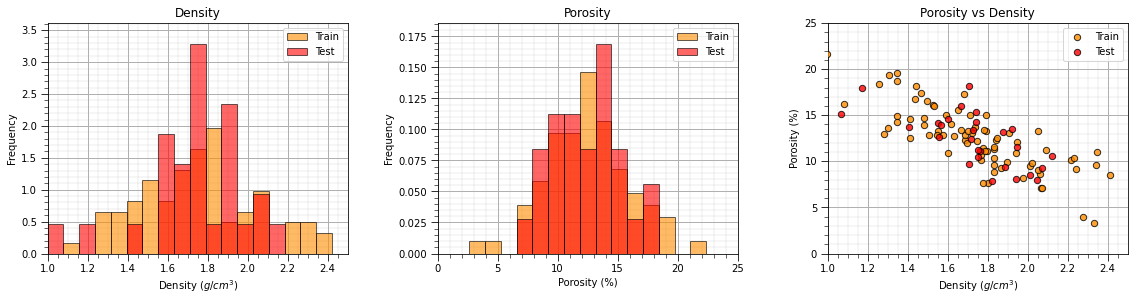

In [8]:
nbins = 20                                                    # number of histogram bins

plt.subplot(131)
freq1,_,_ = plt.hist(x=df_train[xname],weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.6,
                     edgecolor='black',color='darkorange',density=True,label='Train')
freq2,_,_ = plt.hist(x=df_test[xname],weights=None,bins=np.linspace(xmin,xmax,nbins),alpha = 0.6,
                     edgecolor='black',color='red',density=True,label='Test')
max_freq = max(freq1.max()*1.10,freq2.max()*1.10)
plt.xlabel(xname + ' (' + xunit + ')'); plt.ylabel('Frequency'); plt.ylim([0.0,max_freq]); plt.title('Density'); add_grid()  
plt.xlim([xmin,xmax]); plt.legend(loc='upper right')   

plt.subplot(132)
freq1,_,_ = plt.hist(x=df_train[yname],weights=None,bins=np.linspace(ymin,ymax,nbins),alpha = 0.6,
                     edgecolor='black',color='darkorange',density=True,label='Train')
freq2,_,_ = plt.hist(x=df_test[yname],weights=None,bins=np.linspace(ymin,ymax,nbins),alpha = 0.6,
                     edgecolor='black',color='red',density=True,label='Test')
max_freq = max(freq1.max()*1.10,freq2.max()*1.10)
plt.xlabel(yname + ' (' + yunit + ')'); plt.ylabel('Frequency'); plt.ylim([0.0,max_freq]); plt.title('Porosity'); add_grid()  
plt.xlim([ymin,ymax]); plt.legend(loc='upper right')   

plt.subplot(133)                                              # plot the model
plt.scatter(df_train[xname],df_train[yname],s=40,marker='o',color = 'darkorange',alpha = 0.8,edgecolor = 'black',zorder=10,label='Train')
plt.scatter(df_test[xname],df_test[yname],s=40,marker='o',color = 'red',alpha = 0.8,edgecolor = 'black',zorder=10,label='Test')
plt.title('Porosity vs Density')
plt.xlabel(xname + ' (' + xunit + ')')
plt.ylabel(yname + ' (' + yunit + ')')
plt.legend(); add_grid(); plt.xlim([xmin,xmax]); plt.ylim([ymin,ymax])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.5, top=0.8, wspace=0.3, hspace=0.2)
#plt.savefig('Test.pdf', dpi=600, bbox_inches = 'tight',format='pdf')   
plt.show()

#### Linear Regression Model

Let's first calculate the linear regression model. We use scikit learn and then extend the same workflow to ridge regression.

* we are building a model, $\phi = f(\rho)$, where $\phi$ is porosity and $\rho$ is density.
* we could also say, we have "porosity regressed on density".

Our model has this specific equation,

$$
\phi = b_1 \times \rho + b_0
$$

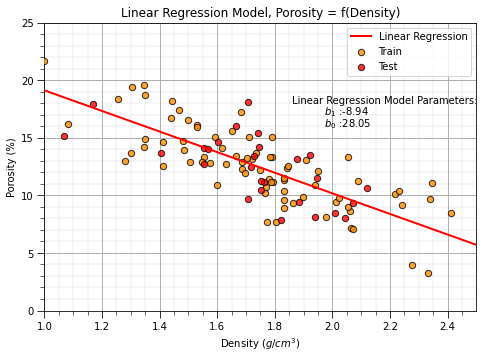

In [9]:
linear_reg = linear_model.LinearRegression()                  # instantiate the model

linear_reg.fit(df_train[xname].values.reshape(len(df_train),1), df_train[yname]) # train the model parameters
x_model = np.linspace(xmin,xmax,10)
y_model_linear = linear_reg.predict(x_model.reshape(-1, 1))   # predict at the withheld test data 

plt.subplot(111)                                              # plot the data, model with model parameters
plt.plot(x_model,y_model_linear, color='red', linewidth=2,label='Linear Regression',zorder=100)
plt.scatter(df_train[xname],df_train[yname],s=40,marker='o',color = 'darkorange',alpha = 0.8,edgecolor = 'black',zorder=10,label='Train')
plt.scatter(df_test[xname],df_test[yname],s=40,marker='o',color = 'red',alpha = 0.8,edgecolor = 'black',zorder=10,label='Test')
plt.annotate('Linear Regression Model Parameters:',[1.86,18]) # add the model to the plot
plt.annotate(r'$b_1$ :' + str(np.round(linear_reg.coef_ [0],2)),[1.97,17])
plt.annotate(r'$b_0$ :' + str(np.round(linear_reg.intercept_,2)),[1.97,16])
plt.title('Linear Regression Model, Porosity = f(Density)')
plt.xlabel(xname + ' (' + xunit + ')')
plt.ylabel(yname + ' (' + yunit + ')')
plt.legend(loc='upper right'); add_grid(); plt.xlim([xmin,xmax]); plt.ylim([ymin,ymax])

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

You may have noticed the additional reshape operation applied to the predictor feature in the predict function.

````python
y_linear_model = linear_reg.predict(x_model.reshape(-1, 1))   # predict at the withheld test data 
````
This is needed because scikit-learn assumes more than one predictor feature; therefore, expects a 2D array of samples (rows) and features (columns), but we have only a 1D vector.

* the reshape operation turns the 1D vector into a 2D vector with only 1 column

#### Linear Regression Model Checks

Let's run some quick model checks.  Much more could be done, but I limit this for brevity here. 

* see the Linear Regression chapter for more information and checks

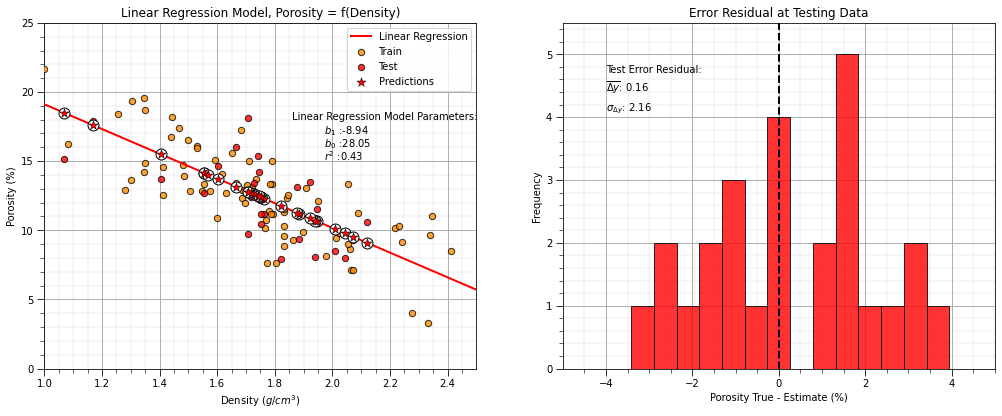

In [10]:
y_pred_linear = linear_reg.predict(df_test[xname].values.reshape(len(df_test),1)) # predict at test data
r_squared_linear = r2_score(df_test[yname].values, y_pred_linear)

plt.subplot(121)                                              # plot testing diagnostics 
plt.plot(x_model,y_model_linear, color='red', linewidth=2,label='Linear Regression',zorder=100)
plt.scatter(df_train[xname],df_train[yname],s=40,marker='o',color = 'darkorange',alpha = 0.8,edgecolor = 'black',zorder=10,label='Train')
plt.scatter(df_test[xname],df_test[yname],s=40,marker='o',color = 'red',alpha = 0.8,edgecolor = 'black',zorder=10,label='Test')
# plt.scatter(df_test[xname], y_pred,color='grey',edgecolor='black',s = 40, alpha = 1.0, label = 'predictions',zorder=100)
plt.scatter(df_test[xname], y_pred_linear,color='white',s=120,marker='o',linewidths=1.0, edgecolors="black",zorder=300)
plt.scatter(df_test[xname], y_pred_linear,color='red',s=90,marker='*',linewidths=0.5, edgecolors="black",zorder=320,label='Predictions')

plt.annotate('Linear Regression Model Parameters:',[1.86,18]) # add the model to the plot
plt.annotate(r'$b_1$ :' + str(np.round(linear_reg.coef_ [0],2)),[1.97,17])
plt.annotate(r'$b_0$ :' + str(np.round(linear_reg.intercept_,2)),[1.97,16])
plt.annotate(r'$r^2$ :' + str(np.round(r_squared_linear,2)),[1.97,15])
plt.title('Linear Regression Model, Porosity = f(Density)')
plt.xlabel(xname + ' (' + xunit + ')')
plt.ylabel(yname + ' (' + yunit + ')')
plt.legend(loc='upper right'); add_grid(); plt.xlim([xmin,xmax]); plt.ylim([ymin,ymax])

y_res_linear = y_pred_linear - df_test['Porosity'].values     # calculate the test residual

plt.subplot(122)
plt.hist(y_res_linear, color = 'red', alpha = 0.8, edgecolor = 'black', bins = np.linspace(-5,5,20))
plt.title("Error Residual at Testing Data"); plt.xlabel(yname + ' True - Estimate (%)');plt.ylabel('Frequency')
plt.vlines(0,0,5.5,color='black',ls='--',lw=2)
plt.annotate('Test Error Residual:',[-4,4.7]) # add residual summary statistics
plt.annotate(r'$\overline{\Delta{y}}$: ' + str(round(np.average(y_res_linear),2)),[-4,4.4])
plt.annotate(r'$\sigma_{\Delta{y}}$: ' + str(np.round(np.std(y_res_linear),2)),[-4,4.1])
add_grid(); plt.xlim(-5,5); plt.ylim(0,5.5)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.2, hspace=0.2); plt.show()

#### Ridge Regression Model

Let's replace the scikit-learn linear regression method with the scikit-learn ridge regression method.

* note, we must now set the $\lambda$ hyperparameter.
* in scikit-learn the hyperparameter(s) is(are) set with the instantiation of the model

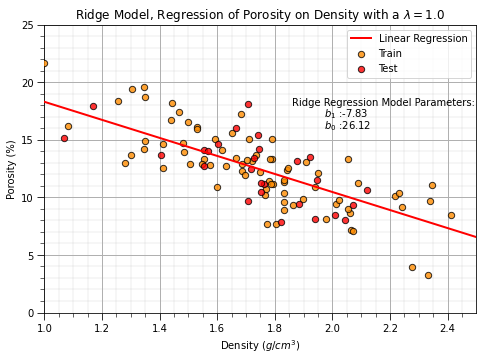

In [11]:
lam = 1.0                                                     # lambda hyperparameter

ridge_reg = Ridge(alpha=lam)                                  # instantiate the model

ridge_reg.fit(df_train[xname].values.reshape(len(df_train),1), df_train[yname]) # train the model parameters
x_model = np.linspace(xmin,xmax,10)
y_model_ridge = ridge_reg.predict(x_model.reshape(10,1))      # predict with the fit model

plt.subplot(111)                                              # plot the data, model with model parameters
plt.plot(x_model,y_model_ridge, color='red', linewidth=2,label='Linear Regression',zorder=100)
plt.scatter(df_train[xname],df_train[yname],s=40,marker='o',color = 'darkorange',alpha = 0.8,edgecolor = 'black',zorder=10,label='Train')
plt.scatter(df_test[xname],df_test[yname],s=40,marker='o',color = 'red',alpha = 0.8,edgecolor = 'black',zorder=10,label='Test')
plt.annotate('Ridge Regression Model Parameters:',[1.86,18]) # add the model to the plot
plt.annotate(r'$b_1$ :' + str(np.round(ridge_reg.coef_ [0],2)),[1.97,17])
plt.annotate(r'$b_0$ :' + str(np.round(ridge_reg.intercept_,2)),[1.97,16])
plt.title('Ridge Model, Regression of ' + yname + ' on ' + xname + ' with a $\lambda = $' + str(lam))
plt.xlabel(xname + ' (' + xunit + ')')
plt.ylabel(yname + ' (' + yunit + ')')
plt.legend(loc='upper right'); add_grid(); plt.xlim([xmin,xmax]); plt.ylim([ymin,ymax])

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

Let's repeat the simple model checks that we applied with our linear regression model.

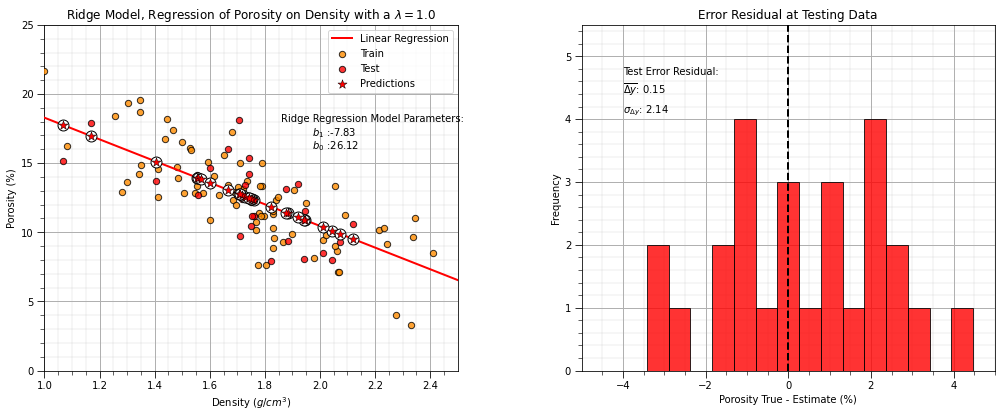

In [12]:
y_pred_ridge = ridge_reg.predict(df_test[xname].values.reshape(len(df_test),1)) # predict at test data
r_squared = r2_score(df_test[yname].values, y_pred_ridge)

plt.subplot(121)                                              # plot testing diagnostics 
plt.plot(x_model,y_model_ridge, color='red', linewidth=2,label='Linear Regression',zorder=100)
plt.scatter(df_train[xname],df_train[yname],s=40,marker='o',color = 'darkorange',alpha = 0.8,edgecolor = 'black',zorder=10,label='Train')
plt.scatter(df_test[xname],df_test[yname],s=40,marker='o',color = 'red',alpha = 0.8,edgecolor = 'black',zorder=10,label='Test')
plt.scatter(df_test[xname], y_pred_ridge,color='white',s=120,marker='o',linewidths=1.0, edgecolors="black",zorder=300)
plt.scatter(df_test[xname], y_pred_ridge,color='red',s=90,marker='*',linewidths=0.5, edgecolors="black",zorder=320,label='Predictions')

plt.annotate('Ridge Regression Model Parameters:',[1.86,18]) # add the model to the plot
plt.annotate(r'$b_1$ :' + str(np.round(ridge_reg.coef_ [0],2)),[1.97,17])
plt.annotate(r'$b_0$ :' + str(np.round(ridge_reg.intercept_,2)),[1.97,16])
plt.title('Ridge Model, Regression of ' + yname + ' on ' + xname + ' with a $\lambda = $' + str(lam))
plt.xlabel(xname + ' (' + xunit + ')')
plt.ylabel(yname + ' (' + yunit + ')')
plt.legend(loc='upper right'); add_grid(); plt.xlim([xmin,xmax]); plt.ylim([ymin,ymax])

y_res_ridge = y_pred_ridge - df_test['Porosity'].values       # calculate the test residual

plt.subplot(122)
plt.hist(y_res_ridge, color = 'red', alpha = 0.8, edgecolor = 'black', bins = np.linspace(-5,5,20))
plt.title("Error Residual at Testing Data"); plt.xlabel(yname + ' True - Estimate (%)');plt.ylabel('Frequency')
plt.vlines(0,0,5.5,color='black',ls='--',lw=2)
plt.annotate('Test Error Residual:',[-4,4.7]) # add residual summary statistics
plt.annotate(r'$\overline{\Delta{y}}$: ' + str(round(np.average(y_res_ridge),2)),[-4,4.4])
plt.annotate(r'$\sigma_{\Delta{y}}$: ' + str(np.round(np.std(y_res_ridge),2)),[-4,4.1])
add_grid(); plt.xlim(-5,5); plt.ylim(0,5.5)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.3, hspace=0.2); plt.show()

Interesting, we explained less variance and have a larger residual standard deviation (more error).

* ridge regression for our arbitrarily selected hyperparameter, $\lambda$, actually reduced both testing variance explained and accuracy 
* this is not surprising, we are not actually tuning the hyperparameter to get the best model!

#### Investigating the Lambda Hyperparameter

Let's loop over multiple lambda values - from 0 to 100 and observe the change in:

* training and testing, mean square error (MSE) and variance explained

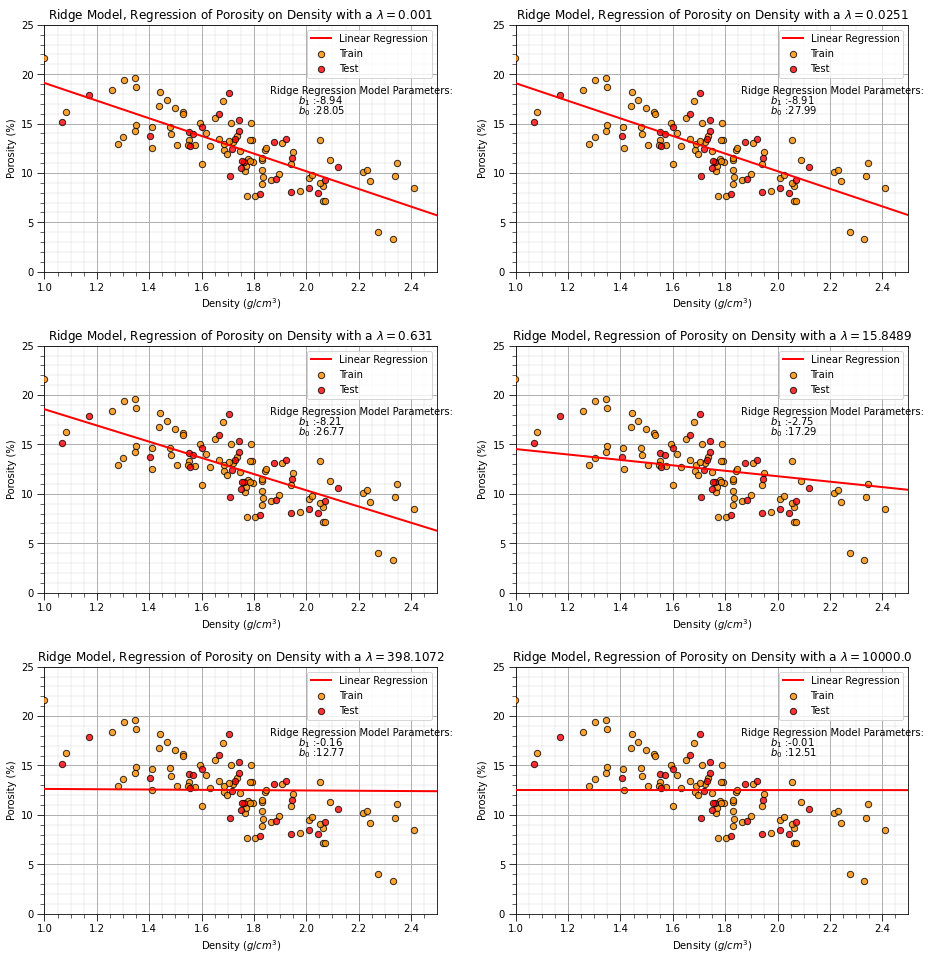

In [19]:
# Arrays to store the results
ncases = 6
lamd_mat = np.logspace(-3,4,ncases)
x_model = np.linspace(xmin,xmax,10)
var_explained_train = np.zeros(ncases); var_explained_test = np.zeros(ncases)
mse_train = np.zeros(ncases); mse_test = np.zeros(ncases)

for ilam in range(0,len(lamd_mat)):                           # Loop over all lambda values
    ridge_reg = Ridge(alpha=lamd_mat[ilam])
    ridge_reg.fit(df_train[xname].values.reshape(len(df_train),1), df_train[yname]) # fit model

    y_model = ridge_reg.predict(x_model.reshape(10,1))        # predict with the fit model  
    y_pred_train = ridge_reg.predict(df_train[xname].values.reshape(len(df_train),1)) # predict with the fit model   
    var_explained_train[ilam] = r2_score(df_train[yname].values, y_pred_train)
    mse_train[ilam] = mean_squared_error(df_train[yname].values, y_pred_train) 
    
    y_pred_test = ridge_reg.predict(df_test[xname].values.reshape(len(df_test),1))
    var_explained_test[ilam] = r2_score(df_test[yname].values, y_pred_test)
    mse_test[ilam] = mean_squared_error(df_test[yname].values, y_pred_test)    
   
    if ilam <= 7:
        plt.subplot(4,2,ilam+1)
        plt.plot(x_model,y_model, color='red', linewidth=2,label='Linear Regression',zorder=100)
        plt.scatter(df_train[xname],df_train[yname],s=40,marker='o',color = 'darkorange',alpha = 0.8,edgecolor = 'black',zorder=10,label='Train')
        plt.scatter(df_test[xname],df_test[yname],s=40,marker='o',color = 'red',alpha = 0.8,edgecolor = 'black',zorder=10,label='Test')
        plt.annotate('Ridge Regression Model Parameters:',[1.86,18]) # add the model to the plot
        plt.annotate(r'$b_1$ :' + str(np.round(ridge_reg.coef_ [0],2)),[1.97,17])
        plt.annotate(r'$b_0$ :' + str(np.round(ridge_reg.intercept_,2)),[1.97,16])
        plt.title('Ridge Model, Regression of ' + yname + ' on ' + xname + ' with a $\lambda = $' + str(round(lamd_mat[ilam],4)))
        plt.xlabel(xname + ' (' + xunit + ')')
        plt.ylabel(yname + ' (' + yunit + ')')
        plt.legend(loc='upper right'); add_grid(); plt.xlim([xmin,xmax]); plt.ylim([ymin,ymax])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=4.2, wspace=0.2, hspace=0.3)
plt.show()

We can observe from the first 8 cases above of the trained ridge regression model that increase in the $\lambda$ hyperparameter decreases the slope of the linear fit.

Let's plot the MSE and variance explained over train and test datasets.

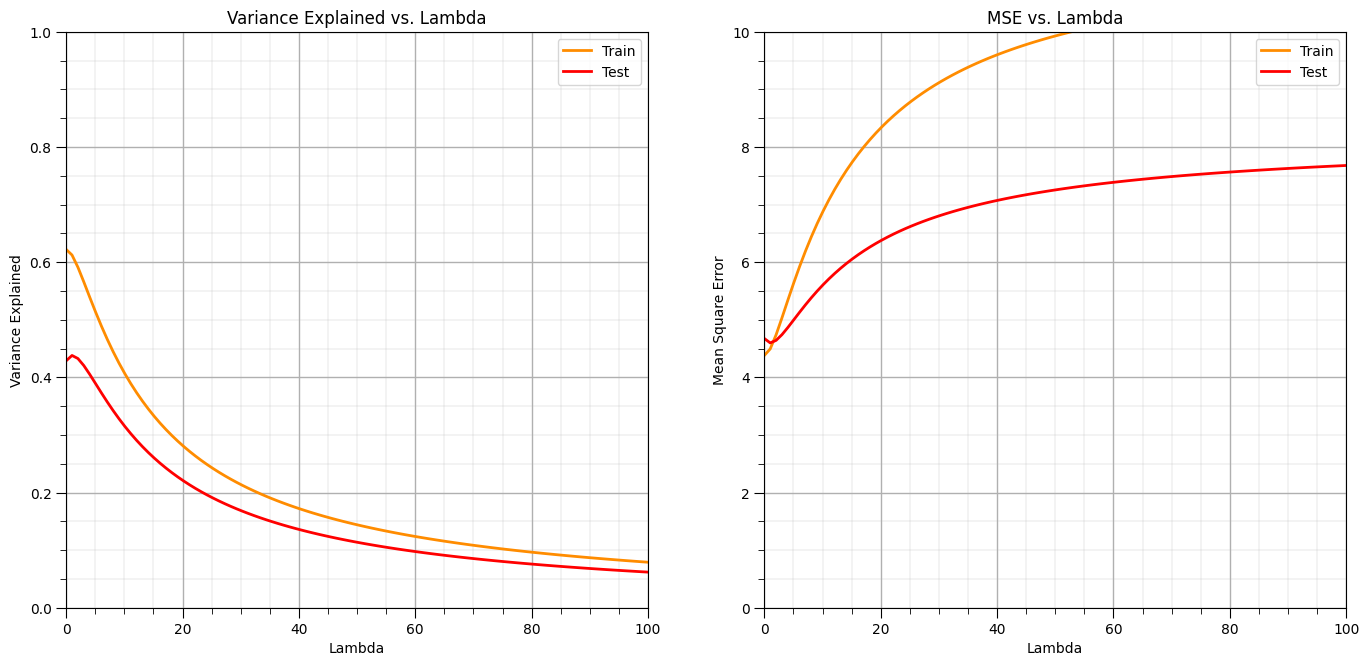

In [14]:
plt.subplot(121)
plt.plot(lamd_mat, var_explained_train,  color='darkorange', linewidth = 2, label = 'Train')
plt.plot(lamd_mat, var_explained_test,  color='red', linewidth = 2, label = 'Test')
plt.title('Variance Explained vs. Lambda'); plt.xlabel('Lambda'); plt.ylabel('Variance Explained')
plt.xlim(0.,100.); plt.ylim(0,1.0); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.legend()

plt.subplot(122)
plt.plot(lamd_mat, mse_train,  color='darkorange', linewidth = 2, label = 'Train')
plt.plot(lamd_mat, mse_test,  color='red', linewidth = 2, label = 'Test')
plt.title('MSE vs. Lambda'); plt.xlabel('Lambda'); plt.ylabel('Mean Square Error')
plt.xlim(0.,100.); plt.ylim(0,10.0); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.legend()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3); plt.show()

We observe that as we increase the lambda parameter the variance explained decreases and the mean square error increases.

* this makes sense as the data has a consistent linear trend and as the slope 'shrinks' to zero the error increases and the variance explained decreases

* there could be other cases where the reduced slope actually performs better in testing. For example with sparse and noisy data. 

#### Model Variance 

Now let's explore the concept of model variance, an important part of machine learning accuracy in testing. 

* the sensitivity of the model to the specific training data
* as $\lambda$ increases the sensitivity to the training data, model variance decreases

Let's demonstrate this with this workflow:

* loop over multiple lambda values
    * loop over multiple bootstrap samples of the data
        * calculate the ridge regression fit (slope)
    * calculate the variance of these bootstrap results

WARNING: this will take several minutes to run

In [15]:
L = 200                                                       # the number of bootstrap realizations 

nsamples = 20                                                 # the number of samples in each bootstrap realization
nlambda = 100                                                 # number of lambda values to evaluate

coef_mat = np.zeros(L)                                        # declare arrays to store the results
variance_coef = np.zeros(nlambda)

#lamd_mat = np.linspace(0.0,100.0,nlambda) 
lambda_mat = np.logspace(-2,5,nlambda)
for ilam in range(0,len(lambda_mat)):                         # loop over all lambda values                   
    for l in range(0, L):                                     # loop over all bootstrap realizations
        df_sample = df.sample(n = nsamples)                   # random sample (1 bootstrap)
        ridge_reg = Ridge(alpha=lambda_mat[ilam])             # instantiate model
        ridge_reg.fit(df_sample[xname].values.reshape(nsamples,1), df_sample[yname]) # fit model
        coef_mat[l] = ridge_reg.coef_[0]                      # get the slope parameter
    variance_coef[ilam] = np.var(coef_mat)                    # calculate the variance of the slopes over the L bootstraps

Now let's plot the result.

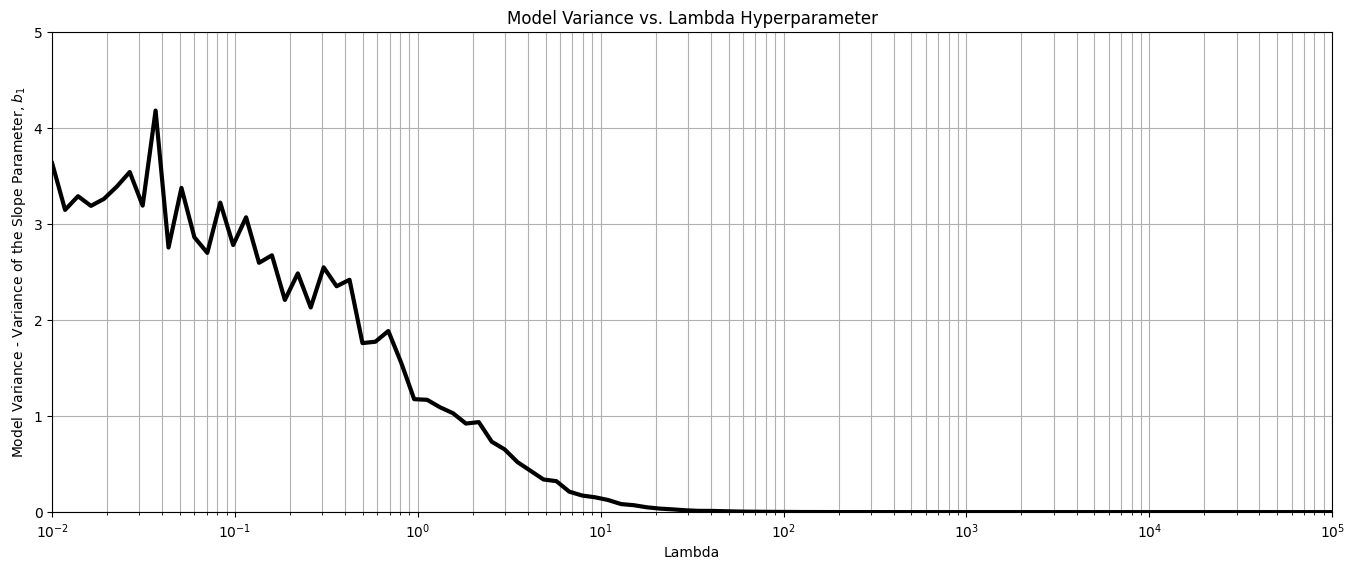

In [16]:
plt.subplot(111)
plt.plot(lambda_mat, variance_coef,  color='black', linewidth = 3, label = 'Slope Variance')
plt.title('Model Variance vs. Lambda Hyperparameter'); plt.xlabel('Lambda'); plt.ylabel('Model Variance - Variance of the Slope Parameter, $b_1$')
plt.xlim(0.01,100000.); plt.ylim(0.0,5.0); plt.xscale('log')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.grid(which='both')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

The result is as expected, with increase in $\lambda$ hyperparameter the sensitivity of the model to the training data is decreased.

#### k-fold Cross Validation

It would be useful to conduct a complete k-fold validation to evaluate the testing error vs. the hyperparameter lambda for model tuning.

* the following code is provided to do this
* once again, with a single predictor feature we must reshape to a 2D array

We loop over 100 $\lambda$ values from 0.01 to 100,000,
* get the negative mean square error for each of the 4 k-folds
* then we take the average and apply the absolute value

Why work with negative mean square error? Simple, to use the functionality in scikit-learn that optimizes by maximization and for consistency with other scores like $r^2$ where larger values are better.

* I find negative MSE confusing, so for plotting I use the absolute value to convert the values to strictly positive.

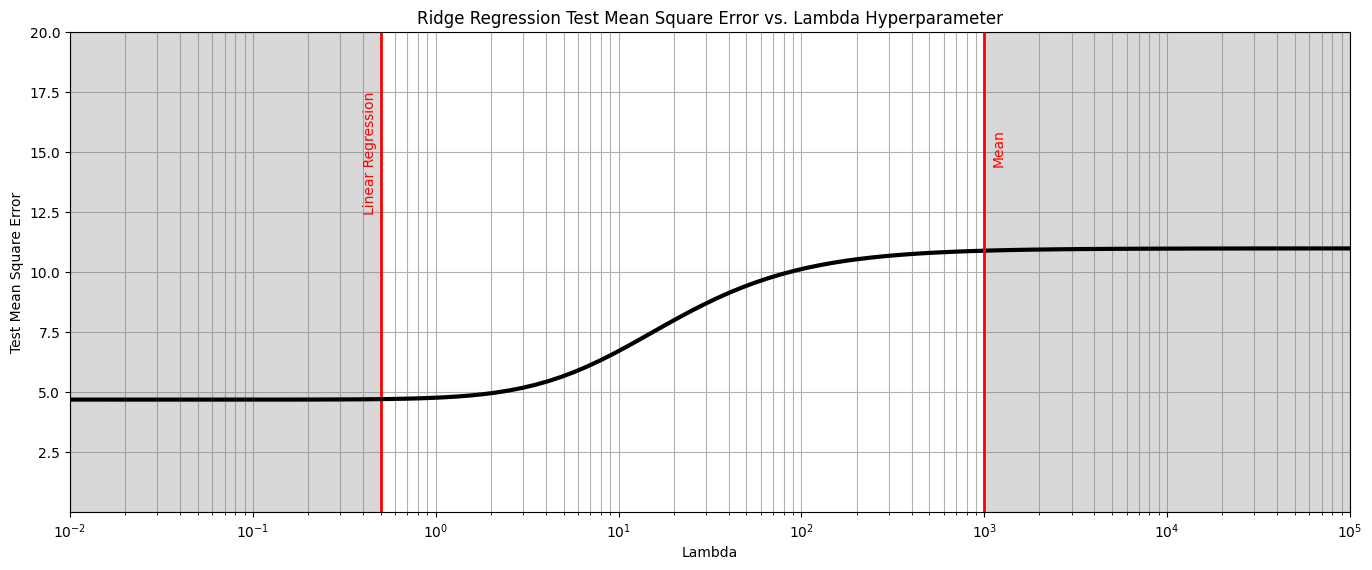

In [17]:
score = []                                                    # code modified from StackOverFlow by Dimosthenis

nlambda = 100
lambda_mat = np.logspace(-2,5,nlambda)
for ilam in range(0,nlambda):
    ridge_reg = Ridge(alpha=lambda_mat[ilam])
    scores = cross_val_score(estimator=ridge_reg, X= df['Density'].values.reshape(-1, 1), y=df['Porosity'].values, cv=10, n_jobs=4, scoring = "neg_mean_squared_error") # Perform 10-fold cross validation
    score.append(abs(scores.mean()))

plt.subplot(111)
plt.plot(lambda_mat, score,  color='black', linewidth = 3, label = 'Test MSA',zorder=10)
plt.title('Ridge Regression Test Mean Square Error vs. Lambda Hyperparameter'); plt.xlabel('Lambda'); plt.ylabel('Test Mean Square Error')
plt.xlim(1.0e-2,1.0e5); plt.ylim(0.001,20.0); plt.xscale('log')
plt.vlines(0.5,0,20,color='red',lw=2); plt.vlines(1000,0,20,color='red',lw=2,zorder=10)
plt.annotate('Linear Regression',[0.4,12.5],rotation=90.0,color='red',zorder=10)
plt.annotate('Mean',[1100,14.5],rotation=90.0,color='red',zorder=10)
plt.fill_between([0.01,0.5],[0,0],[20,20],color='grey',alpha=0.3,zorder=1)
plt.fill_between([1000,100000],[0,0],[20,20],color='grey',alpha=0.3,zorder=1)
plt.grid(which='both')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

From the above we observe 3 phases,

* left - the test MSE levels out at a minimum, the model has converged on linear regression.
* right - the test MSE levels out at a maximum, the model has converged on the predictor feature mean, i.e., model parameter slope is 0.0.
* center - transitional between both cases

In this case we see that the linear regression model ($\lambda = 0.0$) is the best model! If ridge regression is the optimum model the test mean square error would minimize between linear regression and mean.

* this commonly occurs for datasets with issues with noise, data paucity and high dimensionality.

our model is the same as linear regression. 

* could we create a situation where the best model is not linear regression? I.e., were regularization is helpful?
* yes, we can. Let's remove most the samples to create data paucity and add a lot of noise!

Admittedly, I iterated the random seeds for the sample and noise to get this result. 

* few data (low $n$) and high dimensionality (high $m$) will generally result in LASSO outperforming linear regression

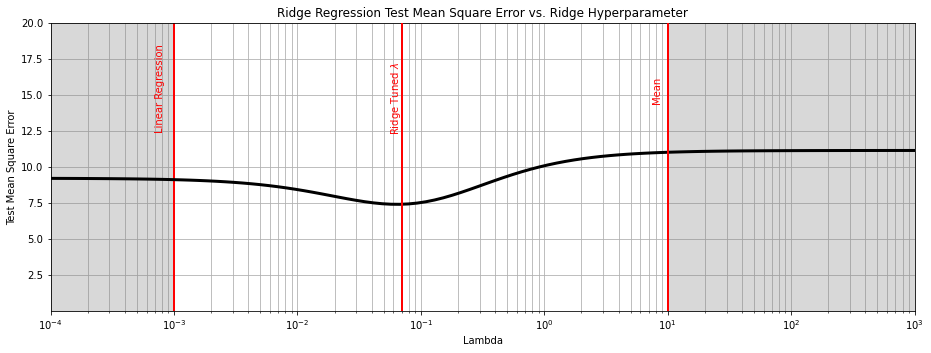

In [37]:
df_sample = df.copy(deep=True).sample(n=10,random_state=11)
noise_stdev = 3.0
np.random.seed(seed=15)
df_sample['Porosity'] = df_sample['Porosity'] + np.random.normal(0.0, noise_stdev, size=len(df_sample))

score = []                                                    # code modified from StackOverFlow by Dimosthenis

nlambda = 100
lambda_mat = np.logspace(-4,3,nlambda)
for ilam in range(0,nlambda):
    ridge_reg = Ridge(alpha=lambda_mat[ilam])
    scores = cross_val_score(estimator=ridge_reg, X= df_sample['Density'].values.reshape(-1, 1), 
                             y=df_sample['Porosity'].values, cv=2, n_jobs=4, scoring = "neg_mean_squared_error") # Perform 10-fold cross validation
    score.append(abs(scores.mean()))

plt.subplot(111)
plt.plot(lambda_mat, score,  color='black', linewidth = 3, label = 'Test MSA',zorder=10)
plt.title('Ridge Regression Test Mean Square Error vs. Ridge Hyperparameter'); plt.xlabel('Lambda'); plt.ylabel('Test Mean Square Error')
plt.xlim(1.0e-4,1.0e3); plt.ylim(0.001,20.0); 
plt.xscale('log')
plt.vlines(0.001,0,20,color='red',lw=2); plt.vlines(10,0,20,color='red',lw=2,zorder=10); 
plt.vlines(0.07,0,20,color='red',lw=2,zorder=10);
plt.annotate('Linear Regression',[0.0007,12.5],rotation=90.0,color='red',zorder=10)
plt.annotate(r'Ridge Tuned $\lambda$',[0.055,12.5],rotation=90.0,color='red',zorder=10)
plt.annotate('Mean',[7.4,14.5],rotation=90.0,color='red',zorder=10)
plt.fill_between([0.0001,0.001],[0,0],[20,20],color='grey',alpha=0.3,zorder=1)
plt.fill_between([10,100000],[0,0],[20,20],color='grey',alpha=0.3,zorder=1)
plt.grid(which='both')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### Comments

I hope you found this chapter helpful. Much more could be done and discussed, I have many more resources. Check out my [shared resource inventory](https://michaelpyrcz.com/my-resources).

*Michael*

#### The Author:

Michael Pyrcz, Professor, The University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig) | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)  